# **Disasters in South Eastern Asia**

## Project Overview

Southeast Asia is one of the most hazard-prone regions about disasters in Asia and the Pacific. The region often suffered the impacts of typhoons, storm surges, floods, drought, and earthquakes.
The purpose of this analysis is to understand the types of disasters in Southeast Asia, which regions are frequently affected. Moreover, I would like to understand more about disasters in Vietnam. 

## Data Description

The disaster data set from the early 20th century to 2021 was collected by [EM-DAT](https://www.emdat.be/) – Emergency Events Database. EM-DAT was created with the initial support of the World Health Organisation (WHO) and the Belgian Government.

The dataset includes attributes such as disaster group, disaster type, disaster name, year, country, location, longitude, latitude, local time, start day, end day, total deaths and total affected...etc

## EDA Goals

Looking at the attributes above and the data, I formulate the following questions:
- Which country is most affected by disasters?
- What type of disaster occurs most often?
- In VietNam, are the central provinces suffering the most natural disasters? Which province have the most affected?

## Exploratory Data Analysis

### Which country is most affected by disasters?

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Preview the dataframe
df = pd.read_csv("disaster_south_eastern_asia_en.csv")
df.head()

,Order,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1,1909-0002-IDN,1909,2,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,...,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
1,2,1914-0022-IDN,1914,22,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,...,NaN,NaN,NaN,NaN,NaN,3.878863,NaN,NaN,NaN,NaN
2,3,1917-0003-IDN,1917,3,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,...,NaN,NaN,NaN,NaN,NaN,4.961337,NaN,NaN,NaN,NaN
3,4,1919-0001-IDN,1919,1,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,...,NaN,NaN,NaN,NaN,NaN,6.713913,NaN,NaN,NaN,NaN
4,5,1924-0007-IDN,1924,7,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,...,NaN,NaN,NaN,NaN,NaN,6.636593,NaN,NaN,NaN,NaN


In [3]:
# Count the number of disasters by countries and shorten the names of countries
df["Country"] = df["Country"].replace(["Philippines (the)","Lao People's Democratic Republic (the)","Brunei Darussalam"],["Philippines","Laos","Brunei"])
df["Country"].value_counts()

Philippines    906
Indonesia      827
Viet Nam       319
Thailand       257
Myanmar        152
Malaysia       140
Laos            60
Cambodia        54
Timor-Leste     13
Singapore        9
Brunei           1
Name: Country, dtype: int64

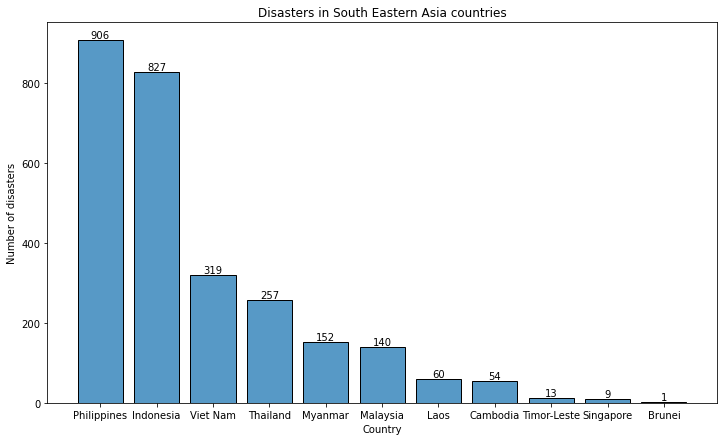

In [4]:
# Modify the size and title
plt.figure(figsize =(12,7))
plt.title("Disasters in South Eastern Asia countries")
plt.ylabel("Number of disasters")
# Sort countries by categorical
df["Country"] = pd.Categorical(df['Country'], df["Country"].value_counts().index)
# Create a hisplot
ax = sns.histplot(data=df,
    x="Country",
    shrink=.8)
# Display value of hisplot
for i in ax.containers:
    ax.bar_label(i,)

    --> Philippines is affected by the most disasters in Southeast Asia

### Which disasters occur most frequently?

In [5]:
# Count and sort the number of Disaster Subgroup
df["Disaster Subgroup"].value_counts()

Hydrological         860
Technological        783
Meteorological       610
Geophysical          289
Biological           119
Climatological        76
Complex Disasters      1
Name: Disaster Subgroup, dtype: int64

EM-DAT classifies Disater Subgroup [here](https://www.emdat.be/classification). In addition to natural disasters, Technological includes accidents caused by humans such as Industrial accident, Transport accident. Some events in this data: "Boeing 707 and Boeing 737 Thailand 1987, Ferry Dona Paz and tanker Victor Philippines 1987, Boeing 777-200 Myanmar 2014",... These are all major historical events occurred in Southeast Asia so I will analyze Technological along with natural disasters.

It's difficult to understand the terminology of the disaster group. I found a picture explaining more effectively

In [6]:
# Show an image from URL
from IPython.display import Image
Image(url="https://digitalregulation.org/wp-content/uploads/word-image.jpeg",width=725, height=300)

<AxesSubplot:title={'center':'Type of disasters in South Eastern Asia countries'}, xlabel='Country', ylabel='Number of disasters'>

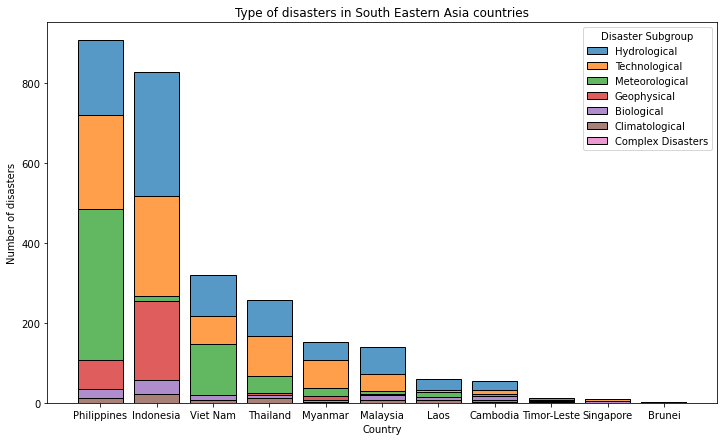

In [7]:
# Modify the size and title
plt.figure(figsize =(12,7))
plt.title("Type of disasters in South Eastern Asia countries")
plt.ylabel("Number of disasters")

# Creat a hisplot
sns.histplot(data=df,
    x="Country",
    hue="Disaster Subgroup",
    hue_order=df["Disaster Subgroup"].value_counts().index,
    multiple="stack",
    shrink=.8)

    --> Hydrological (Floods) affect the majority of countries. This is understandable because most Southeast Asian countries are bordered by the sea, so often affected by floods
    --> In comparison to other natural disasters, Technological occur 2nd frequently. 
    --> Meteorological (Storm) mostly affects Philippines and Vietnam. In order to clarify, Mr.Jason Nicholls - Senior Meteorologist at AccuWeather explain that: The cold ocean current in the Central and Eastern Pacific equator regions combined with the warm ocean current in the West of the Pacific equator regions. This causes a tropical storm towards the Philippines and the East Sea of ​​Vietnam
    --> Geophysical (Earthquake, Volcanic) earthquakes occur mostly in Indonesia. This is because the country sits within the so-called “Pacific Ring of Fire,” a collection of volcanoes and fault lines. The area covers some 40,000 kilometers and is where a majority of the world's earthquakes strike.
    --> Vietnam is mostly affected by storms and floods 
    --> Brunei and Singapore have least number of natural disasters

I found some information from the The Independent Newspaper in Brunei that confirmed the above analysis results. I will crawl some important paragraph from the website, you can see the whole site [here](https://borneobulletin.com.bn/brunei-has-lowest-number-of-disaster-related-displacements-in-southeast-asia-adb/). This confirms the accuracy of data and my analysis

In [53]:
# Get paragraph element <p> in website
import requests
from bs4 import BeautifulSoup
url = "https://borneobulletin.com.bn/brunei-has-lowest-number-of-disaster-related-displacements-in-southeast-asia-adb/"
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})

soup = BeautifulSoup(r.content)
para = soup.find(id="tdi_72")
para.find_all("p")[1].get_text()

'Brunei Darussalam has the least number of disaster-related displacements or forced movements in Southeast Asia from 2010-2021, a recent report of the Asian Development Bank (ADB) and Internal Displacement Monitoring Centre (IDMC) stated.'

In [55]:
para.find_all("p")[7].get_text()

'Almost 31 per cent of the total disaster displacement recorded in the Asia and Pacific region during 2020 – 2021 has been reported in Southeast Asia. The Philippines has been the country most affected, as it experiences between five and 10 destructive tropical cyclones every year, making it one of the countries most at risk of extreme weather events in the Asia and Pacific region and globally.'

### Which Vietnamese provinces are most affected by natural disasters?

Viet Nam is one of the most disaster-prone countries in the world. With a coastline stretching 3 440 km, combined with a diverse and complex topography, Viet Nam suffers from many different types of natural hazards. We often see on social networks and TV that the central provinces have most affected. I will compare this information to actual data to confirm it and find which Vietnamese provinces are most affected by natural disasters?

In [11]:
# Filter disasters in Vietnam
vn_df = df[df["Country"]=="Viet Nam"]
vn_df.head()

,Order,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
243,244,1953-0019-VNM,1953,19,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,...,NaN,NaN,NaN,NaN,NaN,10.36082,NaN,NaN,NaN,NaN
244,245,1956-0050-VNM,1956,50,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,...,NaN,NaN,NaN,NaN,NaN,10.50315,NaN,NaN,NaN,NaN
245,246,1964-0063-VNM,1964,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,...,NaN,NaN,NaN,50000.0,417213.0,11.98428,NaN,NaN,NaN,NaN
246,247,1964-0004-VNM,1964,4,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,...,NaN,NaN,NaN,NaN,NaN,11.98428,NaN,NaN,NaN,NaN
247,248,1964-0102-VNM,1964,102,NaN,Natural,Hydrological,Flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.98428,NaN,NaN,NaN,NaN


In [12]:
vn_df["Geo Locations"]

243                                                   NaN
244                                                   NaN
245                                                   NaN
246                                                   NaN
247                                                   NaN
                              ...                        
2728    Binh Dinh, Dak Lak, Kon Tum, Phu Yen, Quang Na...
2729                                                  NaN
2735                                                  NaN
2736           Ha Giang (Adm1). Tran Yen, Van Ban (Adm2).
2737                                                  NaN
Name: Geo Locations, Length: 319, dtype: object

The data is raw and has many redundant characters. Data cleaning steps:
- Drop NaN Values
- Drop redundant characters: '(Adm1), (Adm2), City, Township'
- Separate provinces by comma
- Count provinces affected by natural disasters 
- Generate Word Clouds


In [13]:
# Drop NaN Values
vn_dropna = vn_df.dropna(subset=['Geo Locations'])
vn_dropna['Geo Locations'].head()

1270                                Tran Van Thoi (Adm2).
1271    An Giang, Can Tho city, Dong Thap, Kien Giang,...
1272    Binh Dinh, Binh Thuan, Khanh Hoa, Ninh Thuan, ...
1273                                        Sa Pa (Adm2).
1274                                       Sin Ho (Adm2).
Name: Geo Locations, dtype: object

In [14]:
# Drop redundant characters: '(Adm1), (Adm2), City, Township'

pattern = '|'.join(['city', 'City', 'Township',"\(.*\)", ""])
# \(.*\) in regex mean parentheses and all data within

vn_replace = vn_dropna['Geo Locations'].str.replace(".",",",regex=True).str.replace(pattern, "", regex=True)
vn_replace.head()

1270                                      Tran Van Thoi ,
1271    An Giang, Can Tho , Dong Thap, Kien Giang, Lon...
1272    Binh Dinh, Binh Thuan, Khanh Hoa, Ninh Thuan, ...
1273                                              Sa Pa ,
1274                                             Sin Ho ,
Name: Geo Locations, dtype: object

In [15]:
# Separate provinces by comma
vn_split = vn_replace.str.split(",",expand=True)
vn_split.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1270,Tran Van Thoi,,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1271,An Giang,Can Tho,Dong Thap,Kien Giang,Long An,Tien Giang,Vinh Long,,None,None,...,None,None,None,None,None,None,None,None,None,None
1272,Binh Dinh,Binh Thuan,Khanh Hoa,Ninh Thuan,Phu Yen,Quang Nam,Quang Ngai,Quang Tri,Thua Thien - Hue,,...,None,None,None,None,None,None,None,None,None,None
1273,Sa Pa,,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1274,Sin Ho,,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [16]:
# Count provinces affected by natural disasters 
vn_wordclound = vn_split.stack().str.strip().value_counts()
vn_wordclound.head(10)

                    154
Quang Nam            42
Quang Ngai           39
Ha Tinh              34
Nghe An              33
Quang Tri            33
Binh Dinh            32
Thanh Hoa            31
Thua Thien - Hue     31
Quang Binh           27
dtype: int64

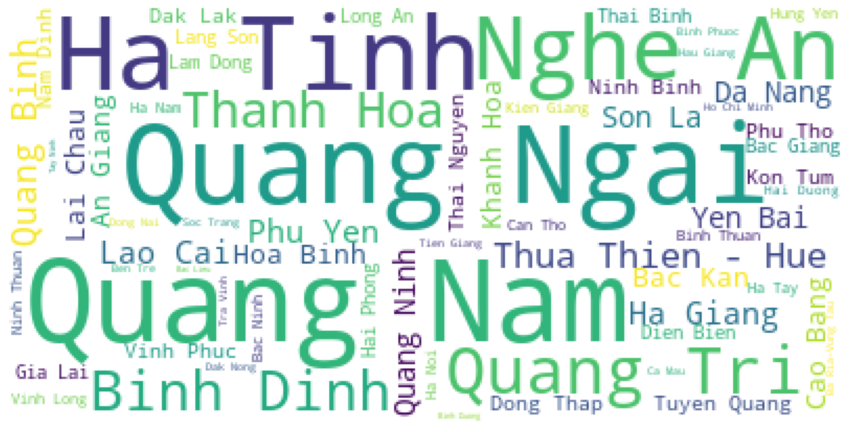

In [17]:
# Generate Word Clouds
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size = 85, background_color = 'white').generate_from_frequencies(vn_wordclound)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


    --> The central provinces have been most affected
    --> Quang Nam has the most natural disasters in Vietnam.

## Conclusions

This Exploratory Data Analysis was made when 1 super typhoon was coming to Vietnam especially the central provinces. Although it has taken a lot of time and effort, the results are all things that everyone knows like "Most disaters in Asian South Eastern Asia is Flood, or the central provinces have been most affected. Thank you for reading a useless analysis.